# SHAP vs LIME

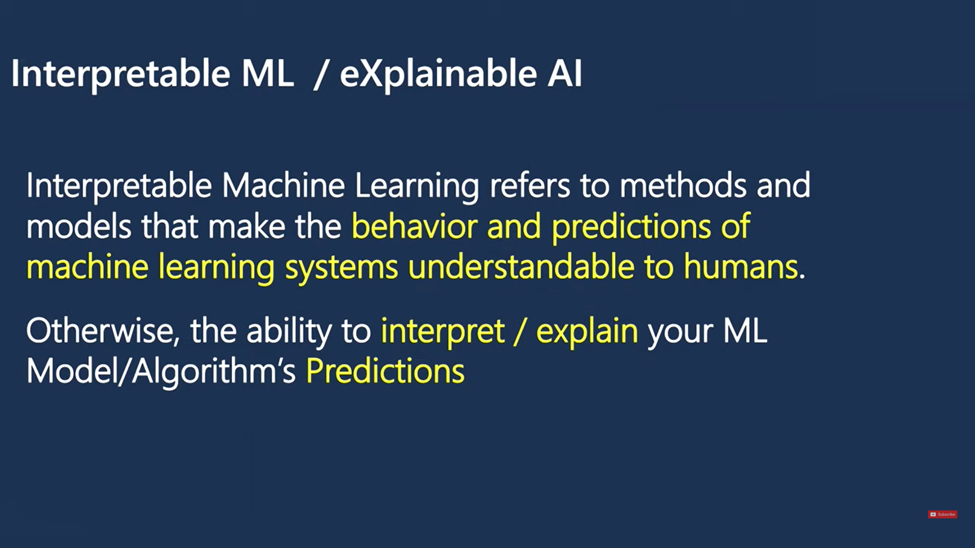

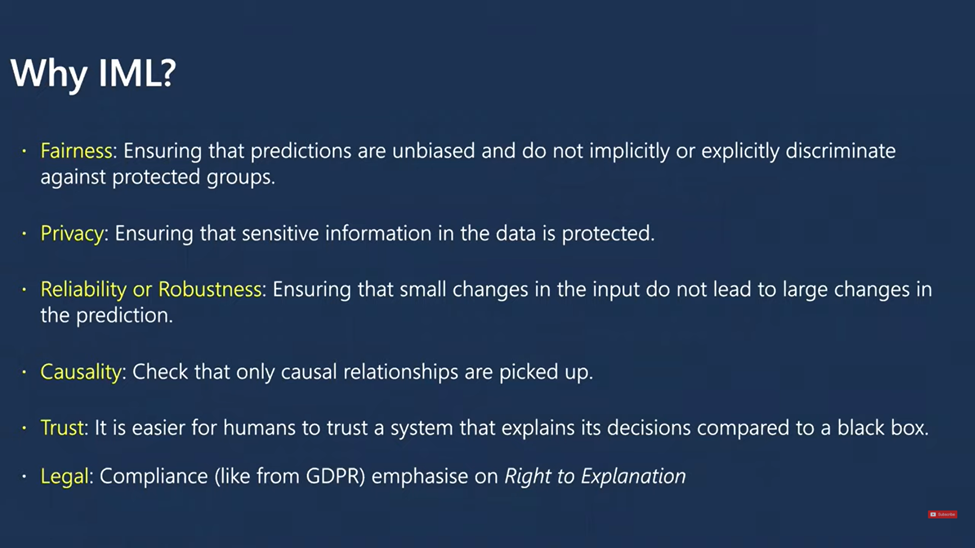

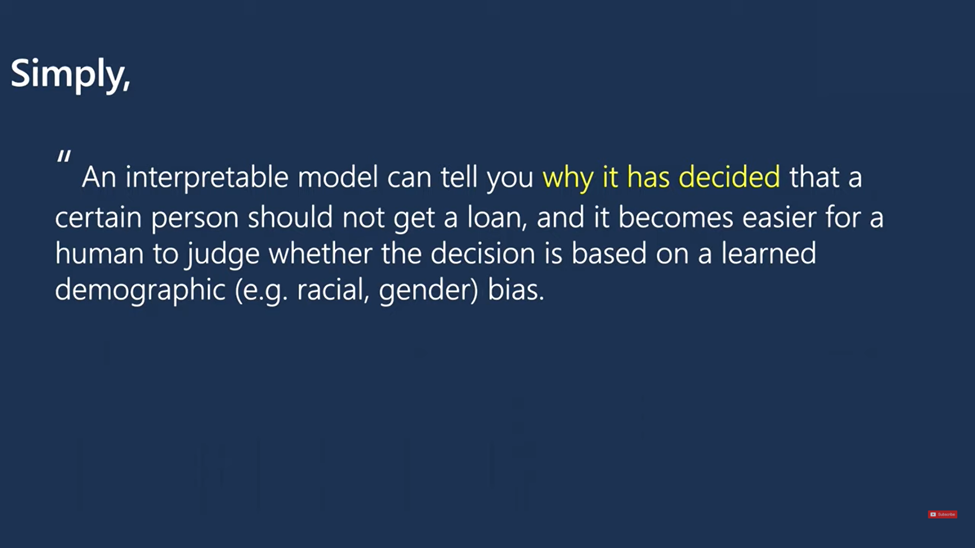

# LIME

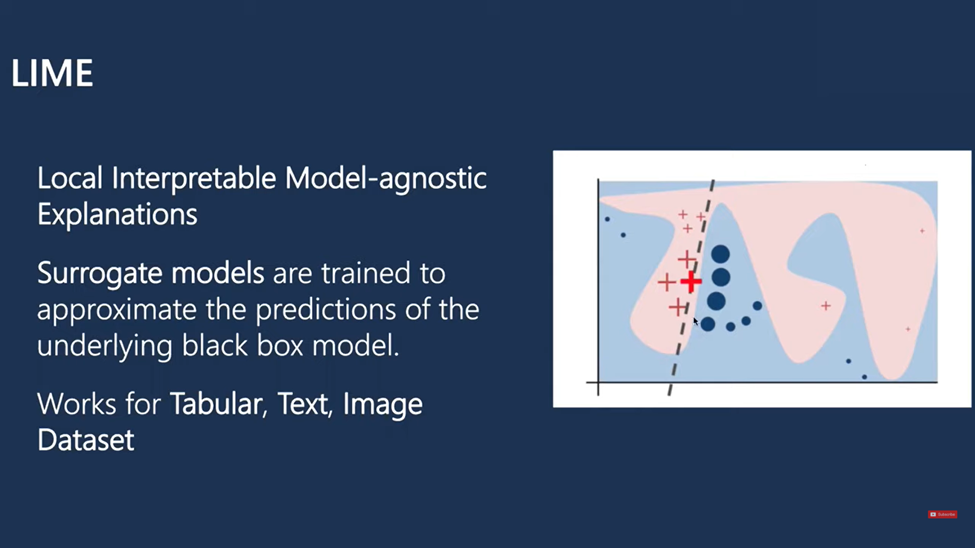

Note: Model-agnostic methods are methods you can use for any machine learning model, from support vector machines to neural networks

## Import required libraries

In [119]:
from __future__ import print_function
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import lime
import lime.lime_tabular
np.random.seed(1)

In [120]:
# Load and split the data

data = pd.read_csv('titanic.csv')
train, test = train_test_split(data, test_size=0.3, stratify=data['Survived'], random_state=0)

In [121]:
train.head()

PassengerId  Survived  Pclass                        Name   Sex   Age  \
76           968         0       3            Miles, Mr. Frank  male   NaN   
247         1139         0       2      Drew, Mr. James Vivian  male  42.0   
370         1262         0       2            Giles, Mr. Edgar  male  21.0   
390         1282         0       1  Payne, Mr. Vivian Ponsonby  male  23.0   
226         1118         0       3  Asplund, Mr. Johan Charles  male  23.0   

     SibSp  Parch  Ticket     Fare Cabin Embarked  
76       0      0  359306   8.0500   NaN        S  
247      1      1   28220  32.5000   NaN        S  
370      1      0   28133  11.5000   NaN        S  
390      0      0   12749  93.5000   B24        S  
226      0      0  350054   7.7958   NaN        S

## EDA

In [122]:
# Dropping features which are not required

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [123]:
# Convert categrical variables into dummy/indicator variables
train_processed = pd.get_dummies(train)
test_processed = pd.get_dummies(test)

# Filling NaN values
train_processed = train_processed.fillna(train_processed.mean())
test_processed = test_processed.fillna(test_processed.mean())

In [124]:
test_processed

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
68          0       1  31.000000      0      0  28.5375           0         1   
190         0       2  34.000000      1      0  26.0000           0         1   
128         0       2  42.000000      0      0  13.0000           0         1   
396         0       3  24.000000      0      0   7.2500           0         1   
261         0       3  21.000000      0      0   7.8542           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
329         0       2  21.000000      0      0  13.0000           0         1   
244         0       3  33.720094      1      2  23.4500           0         1   
391         1       1  51.000000      0      1  39.4000           1         0   
323         0       1  33.000000      0      0  26.5500           0         1   
113         1       3  18.500000      0      0   7.2833           1         0   

     Embarked_C  Embarked_Q  Embarked_S  
68            1           0           0  
190           0           0           1  
128           0           0           1  
396           0           1           0  
261           0           0           1  
..          ...         ...         ...  
329           0           0           1  
244           0           0           1  
391           0           0           1  
323           0           0           1  
113           0           1           0  

[126 rows x 11 columns]

In [125]:
# Create xtrain, ytrain, xtest, ytest

xtrain = train_processed.drop(['Survived'], axis=1)
ytrain = train_processed['Survived']

xtest = test_processed.drop(['Survived'], axis=1)
ytest = test_processed['Survived']

In [126]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(xtrain, ytrain)
rf_preds = rf_classifier.predict(xtest)

print('The accuracy of the Random Forest model is :\t', accuracy_score(rf_preds, ytest))

The accuracy of the Random Forest model is :	 1.0


## Model Explainer

In [127]:
# 1st thing for a model explainer is to create a prediction function where predict_proba will give us the probabilities and 
# then convert it to float type

predict_rf = lambda x: rf_classifier.predict_proba(x).astype(float)

We can give categorical features separately as below:

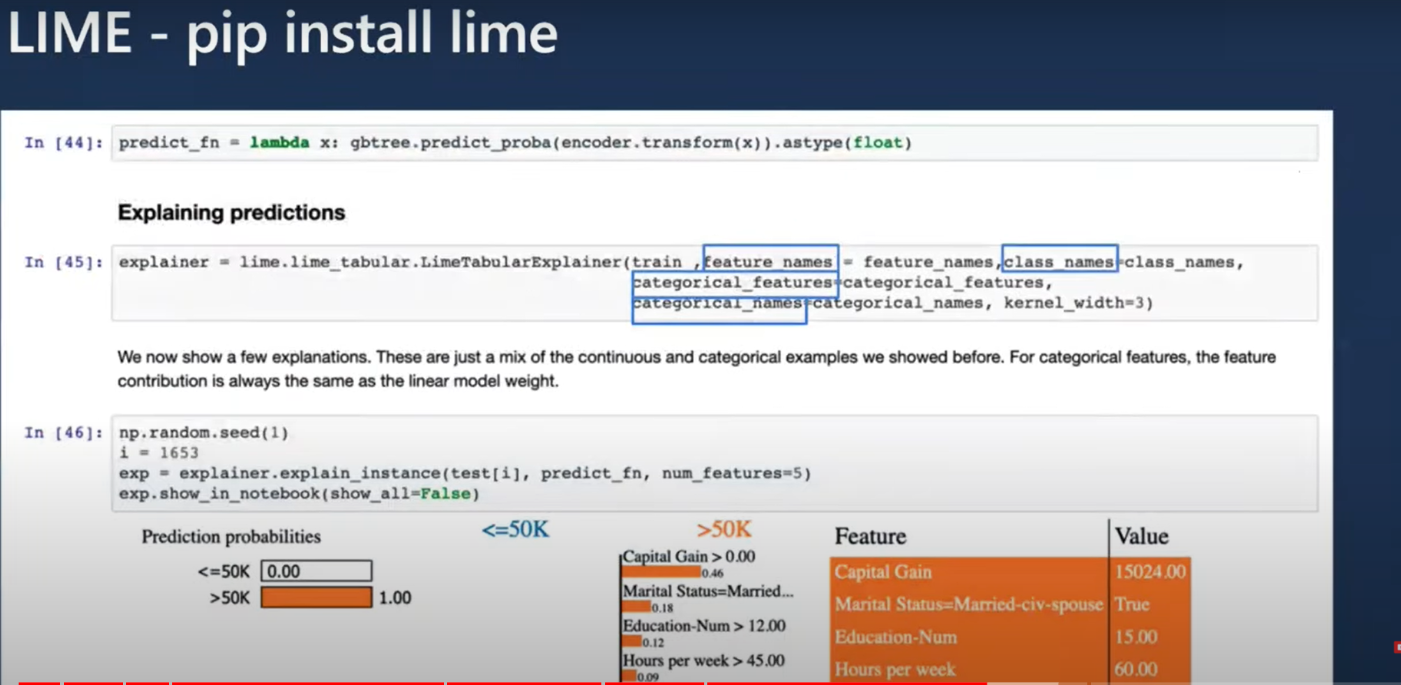

In [77]:
test.tail()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
329         0       2    male  21.0      0      0  13.0000        S
244         0       3    male   NaN      1      2  23.4500        S
391         1       1  female  51.0      0      1  39.4000        S
323         0       1    male  33.0      0      0  26.5500        S
113         1       3  female  18.5      0      0   7.2833        Q

In [78]:
test.loc[391]

Survived         1
Pclass           1
Sex         female
Age           51.0
SibSp            0
Parch            1
Fare          39.4
Embarked         S
Name: 391, dtype: object

In [86]:
xtest.loc[[391]]

Pclass   Age  SibSp  Parch  Fare  Sex_female  Sex_male  Embarked_C  \
391       1  51.0      0      1  39.4           1         0           0   

     Embarked_Q  Embarked_S  
391           0           1

In [89]:
xtest.loc[[391]].values[0]

# xtest.loc[371].values also gives the same result

array([ 1. , 51. ,  0. ,  1. , 39.4,  1. ,  0. ,  0. ,  0. ,  1. ])

### Taking set of value where Survived

In [85]:
# provide the values in the testing dataset at location 391
chosen_instance = xtest.loc[[391]].values[0]

# provide the explainer with the required values - chosen set of values, prediction function, number of features to showcase
exp = explainer.explain_instance(chosen_instance, predict_rf, num_features=10)

# show the explaination in notebook in UI
exp.show_in_notebook(show_all=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Taking set of value where Not Survived

In [90]:
chosen_instance = xtest.loc[[329]].values[0]
exp = explainer.explain_instance(chosen_instance, predict_rf, num_features=10)
exp.show_in_notebook(show_all=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Taking set of value where Not Survived with 3 number of features

In [91]:
chosen_instance = xtest.loc[[329]].values[0]
exp = explainer.explain_instance(chosen_instance, predict_rf, num_features=3)
exp.show_in_notebook(show_all=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


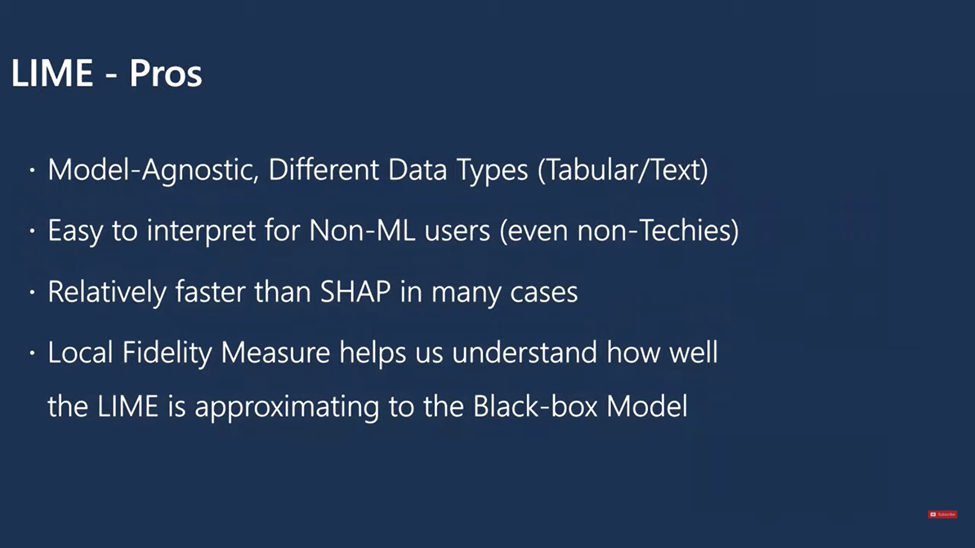

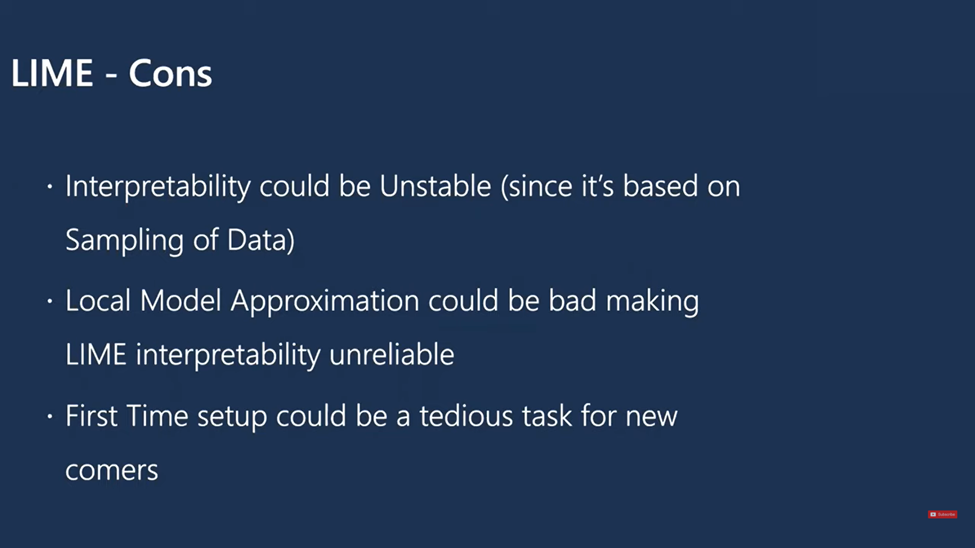

More number of features, more computationally expensive

# SHAP

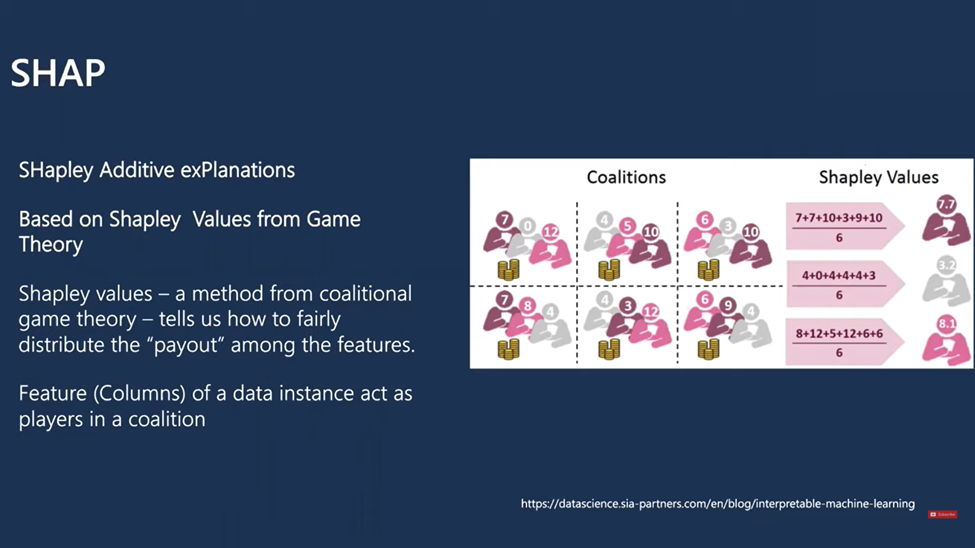

## Import required ibraries

While importing shap (import shap) we got below error:
- ImportError: Numba needs NumPy 1.20 or less


Tried to uninstall numpy using pip in Jupyter Notebook but it took a lot of time.

Jupyter Notebook doesn't Uninstall package with pip.
I tried to remove the package with pip in a Jupyter notebook but it never finishes and I have to eventually interrupt the kernel without uninstalling it.

I found out why it hangs up. When running it from the command line, it asks whether I want to uninstall with a yes/no required.
So tried below command and it worked

- !python -m pip uninstall numpy --yes

Still shap was not getting imported as there was some issue so re-started the kernel and then re-installed numpy version 1.19.3 and then it worked.

In [45]:
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.ensemble import RandomForestClassifier
import shap
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

In [9]:
# print the JS visualization code to the notebook
shap.initjs()

In [21]:
# Provide the datasets to X and y

X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

print(X.shape)
print(y.shape)

print(X_display.shape)
print(y_display.shape)

(32561, 12)
(32561,)
(32561, 12)
(32561,)


In [38]:
X.head()

# Here we have all the categorical data in encoded format

Age  Workclass  Education-Num  Marital Status  Occupation  Relationship  \
0  39.0          7           13.0               4           1             0   
1  50.0          6           13.0               2           4             4   
2  38.0          4            9.0               0           6             0   
3  53.0          4            7.0               2           6             4   
4  28.0          4           13.0               2          10             5   

   Race  Sex  Capital Gain  Capital Loss  Hours per week  Country  
0     4    1        2174.0           0.0            40.0       39  
1     4    1           0.0           0.0            13.0       39  
2     4    1           0.0           0.0            40.0       39  
3     2    1           0.0           0.0            40.0       39  
4     2    0           0.0           0.0            40.0        5

In [39]:
X_display.head()

# Here we have all the categorical data in original format

Age          Workclass  Education-Num       Marital Status  \
0  39.0          State-gov           13.0        Never-married   
1  50.0   Self-emp-not-inc           13.0   Married-civ-spouse   
2  38.0            Private            9.0             Divorced   
3  53.0            Private            7.0   Married-civ-spouse   
4  28.0            Private           13.0   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital Gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   Capital Loss  Hours per week         Country  
0           0.0            40.0   United-States  
1           0.0            13.0   United-States  
2           0.0            40.0   United-States  
3           0.0            40.0   United-States  
4           0.0            40.0            Cuba

In [40]:
# Create the train/test split on X and y (i.e. using categorical encoded data)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=7)

# create the data matrix for training and testing data
d_train = xgboost.DMatrix(xtrain, label=ytrain)
d_test = xgboost.DMatrix(xtest, label=ytest)

Data Matrix used in XGBoost.

When using the XGBoost Python package you can choose between two different APIs to train your model. XGB's own Learning API and the Scikit-Learn API.
When using the Scikit-Learn API data is passed to the model as numpy array or pandas dataframes. When using the Learning API data is passed using the DMatrix.

DMatrix is an internal data structure that is used by XGBoost,
which is optimized for both memory efficiency and training speed.
You can construct DMatrix from multiple different sources of data.

In [41]:
print(xtrain.shape)
print(xtest.shape)

(22792, 12)
(9769, 12)


In [114]:
params = {
    "eta": 0.01, 
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(ytrain),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals=[(d_test, "test")], verbose_eval=100, early_stopping_rounds=10)

[0]	test-logloss:0.54810
[100]	test-logloss:0.36435
[200]	test-logloss:0.31767
[300]	test-logloss:0.30006
[400]	test-logloss:0.29106
[500]	test-logloss:0.28566
[600]	test-logloss:0.28231
[700]	test-logloss:0.28024
[800]	test-logloss:0.27902
[900]	test-logloss:0.27812
[1000]	test-logloss:0.27739
[1100]	test-logloss:0.27683
[1152]	test-logloss:0.27667


In [115]:
# this will take some time since we are explaining over 30,000 samples in a model with over a 1000 trees

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtrain)

Below 3 will give same values :

X.iloc[0, ], X.iloc[0, :], X.iloc[0] 

### Example 1:

In [59]:
X_display.iloc[22791]

Age                              39.0
Workclass                Self-emp-inc
Education-Num                    14.0
Marital Status     Married-civ-spouse
Occupation            Exec-managerial
Relationship                  Husband
Race                            White
Sex                              Male
Capital Gain                      0.0
Capital Loss                      0.0
Hours per week                   60.0
Country                 United-States
Name: 22791, dtype: object

In [60]:
y_display[22791]

True

In [87]:
explainer.expected_value

-1.4582379

In [88]:
shap_values[22791]

array([ 0.9774801 ,  0.09468086,  0.00666483, -0.12950708,  0.7817655 ,
       -1.3452511 ,  0.04760077, -0.30807105, -0.11663631, -0.03600775,
       -0.02537447,  0.00364295], dtype=float32)

We need to provide mainly 3 parameters to shap.force_plot():
- base_value
- shap_values
- features

In [116]:
shap.force_plot(explainer.expected_value, shap_values[22791, :], X_display.iloc[22791, :])

In [117]:
shap.force_plot(explainer.expected_value, shap_values[22791], features=X_display.iloc[22791])

### Example 2:

In [98]:
X_display.iloc[22790]

Age                              31.0
Workclass            Self-emp-not-inc
Education-Num                     8.0
Marital Status     Married-civ-spouse
Occupation                      Sales
Relationship                     Wife
Race               Asian-Pac-Islander
Sex                            Female
Capital Gain                      0.0
Capital Loss                      0.0
Hours per week                   50.0
Country                             ?
Name: 22790, dtype: object

In [99]:
y_display[22790]

False

In [100]:
shap.force_plot(explainer.expected_value, shap_values[22790], features=X_display.iloc[22790])

### Example 3:

In [108]:
X_display.iloc[22767]

Age                              44.0
Workclass                     Private
Education-Num                    10.0
Marital Status     Married-civ-spouse
Occupation                      Sales
Relationship                  Husband
Race                            White
Sex                              Male
Capital Gain                      0.0
Capital Loss                      0.0
Hours per week                   50.0
Country                       England
Name: 22767, dtype: object

In [107]:
y_display[22767]

True

In [109]:
shap.force_plot(explainer.expected_value, shap_values[22767], features=X_display.iloc[22767])

In [112]:
shap_values.shape

(22792, 12)

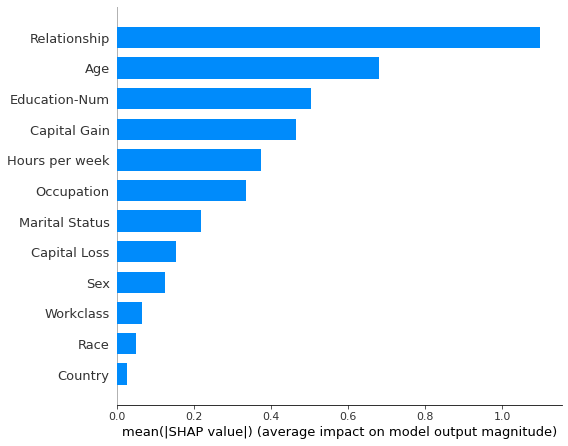

In [118]:
# shap also helps you aggregate every local information and it helps you give a summary plot just like feature importance:

shap.summary_plot(shap_values, features=X_display, plot_type="bar")

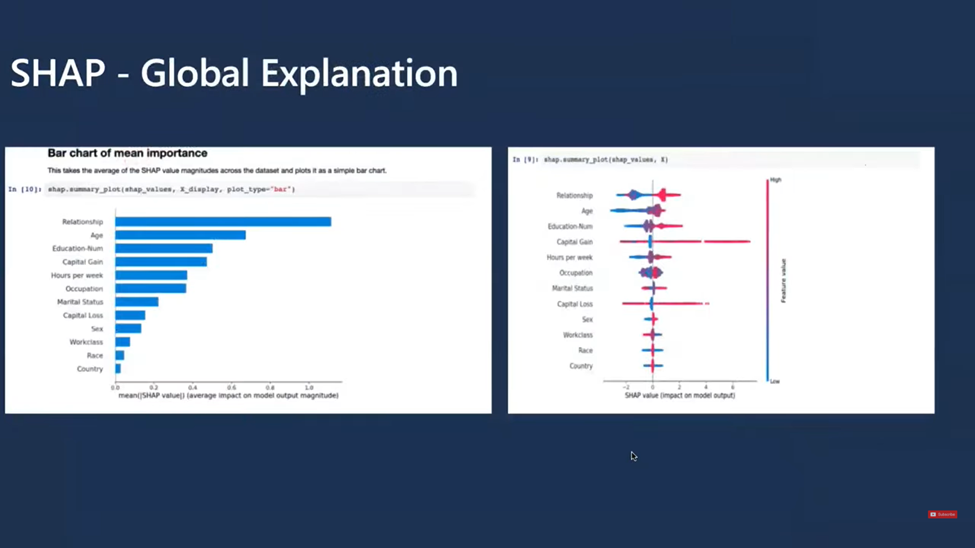

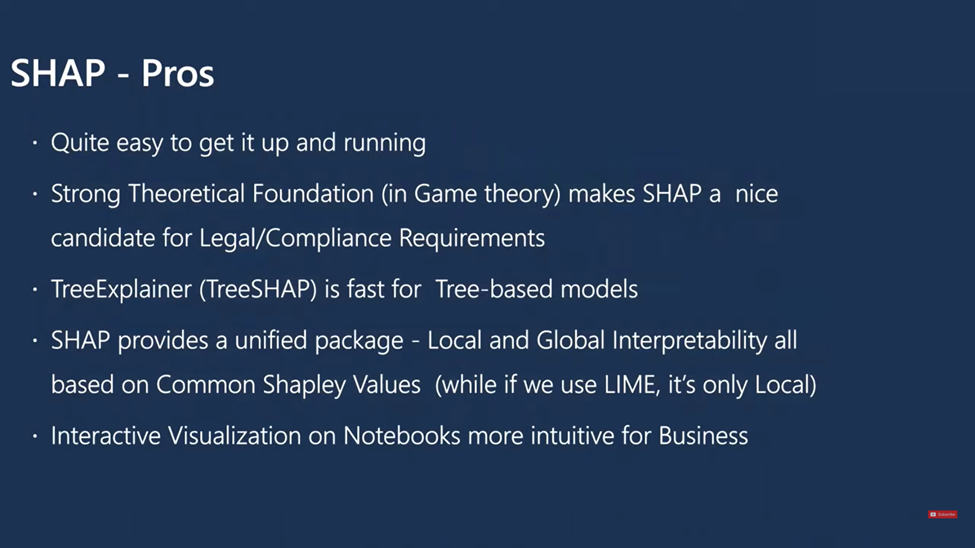

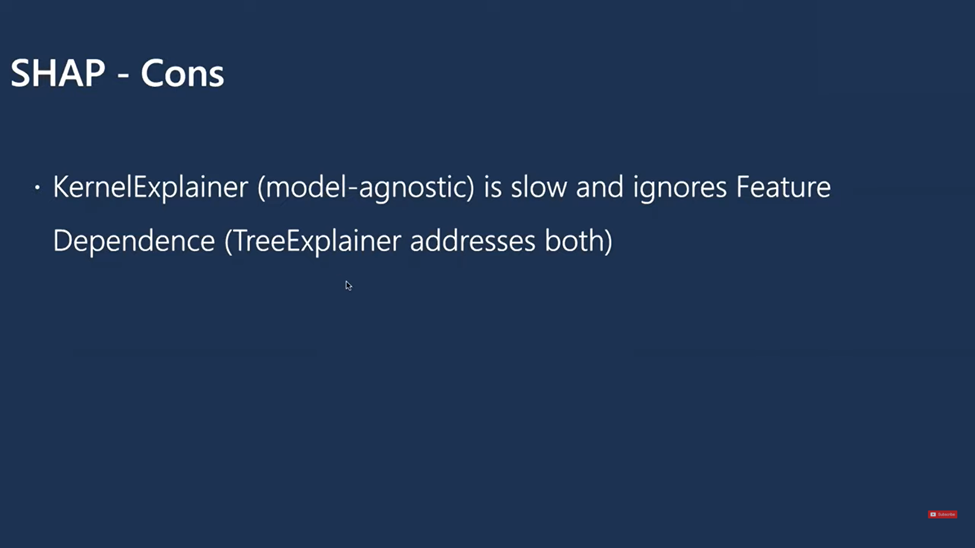

Other than computational problem shapley is really good.

Also when it comes to SHAP vs LIME then SHAP is really really good.